Copyright (c) 2022 AIClub

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without 
limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of 
the Software, and to permit persons to whom the Software is furnished to do so, subject to the following 
conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial
portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT 
LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO 
EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN 
AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE 
OR OTHER DEALINGS IN THE SOFTWARE.

Follow our courses - https://www.corp.aiclub.world/courses



In [ ]:
def launch_fe(data):
    import os
    import pandas as pd
    from io import StringIO
    import json
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.feature_extraction import text
    import pickle
    from scipy import sparse
    MAX_TEXT_FEATURES = 200
    columns_list = ["rerun_ID", "cam_col", "class", "obj_ID", "alpha", "delta", "u", "g", "r", "i", "z", "run_ID", "field_ID", "spec_obj_ID", "redshift", "plate", "MJD", "fiber_ID"]

    dataset = pd.read_csv(data, skipinitialspace=True)
    num_samples = len(dataset)

    # Encode labels into numbers starting with 0
    label = "class"
    tmpCol = dataset[label].astype('category')
    dict_encoding = { label: dict(enumerate(tmpCol.cat.categories))}
    # Save the model
    model_name = "af49c320-c232-4a01-9580-3271d5b37bdc"
    fh = open(model_name, "wb")
    pickle.dump(dict_encoding, fh)
    fh.close()

    label = "class"
    dataset[label] = tmpCol.cat.codes

    # Move the label column
    cols = list(dataset.columns)
    colIdx = dataset.columns.get_loc("class")
    # Do nothing if the label is in the 0th position
    # Otherwise, change the order of columns to move label to 0th position
    if colIdx != 0:
        cols = cols[colIdx:colIdx+1] + cols[0:colIdx] + cols[colIdx+1:]
        dataset = dataset[cols]

    # split dataset into train and test
    train, test = train_test_split(dataset, test_size=0.2, random_state=42)

    # Write train and test csv
    train.to_csv('train.csv', index=False, header=False)
    test.to_csv('test.csv', index=False, header=False)
    column_names = list(train.columns)
def get_model_id():
    return "af49c320-c232-4a01-9580-3271d5b37bdc"


In [ ]:

# Upload a correct file from your local machine
from io import BytesIO
from google.colab import files
uploaded_file = files.upload()
for name in uploaded_file.keys():
    filename = name
data = BytesIO(uploaded_file[filename])


Saving balanced_star_classification.csv to balanced_star_classification.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Launch FE
launch_fe(data)


In [ ]:

# import the library of the algorithm
from sklearn.neighbors import KNeighborsClassifier

# Initialize hyperparams
n_neighbors = 10

# Initialize the algorithm
model = KNeighborsClassifier(n_neighbors=n_neighbors)


In [ ]:

import pandas as pd
# Load the test and train datasets
train = pd.read_csv('train.csv', skipinitialspace=True, header=None)
test = pd.read_csv('test.csv', skipinitialspace=True, header=None)
# Train the algorithm
model.fit(train.iloc[:,1:], train.iloc[:,0])


KNeighborsClassifier(n_neighbors=10)

In [ ]:
def encode_confusion_matrix(confusion_matrix):
    import pickle
    encoded_matrix = dict()
    object_name = get_model_id()
    file_name = open(object_name, 'rb')
    dict_encoding = pickle.load(file_name)
    labels = list(dict_encoding.values())[0]
    for row_indx, row in enumerate(confusion_matrix):
        encoded_matrix[labels[row_indx]] = {}
        for item_indx, item in enumerate(row):
            encoded_matrix[labels[row_indx]][labels[item_indx]] = item
    return encoded_matrix


In [ ]:

# Predict the class labels
y_pred = model.predict(test.iloc[:,1:])
# import the library to calculate confusion_matrix
from sklearn.metrics import confusion_matrix
# calculate confusion matrix
confusion_matrix = confusion_matrix(test.iloc[:,0], y_pred)
encoded_matrix = encode_confusion_matrix(confusion_matrix)
print('Confusion matrix of the model is: ', encoded_matrix)
# calculate accuracy
score = model.score(test.iloc[:, 1:], test.iloc[:, 0])
# The value is returned as a decimal value between 0 and 1
# converting to percentage
accuracy = score * 100
print('Accuracy of the model is: ', accuracy)


Confusion matrix of the model is:  {'GALAXY': {'GALAXY': 2827, 'QSO': 689, 'STAR': 338}, 'QSO': {'GALAXY': 969, 'QSO': 2426, 'STAR': 416}, 'STAR': {'GALAXY': 788, 'QSO': 934, 'STAR': 1990}}
Accuracy of the model is:  63.6635316867364


In [ ]:
from sklearn.metrics import confusion_matrix
y_true=test.iloc[:,0]
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[2827  689  338]
 [ 969 2426  416]
 [ 788  934 1990]]


In [ ]:

# fe_transform function traansforms raw data into a form the model can consume
print('Below is the prediction stage of the AI')
def fe_transform(data_dict, object_path=None):
    import os
    import pandas as pd
    from io import StringIO
    import json
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.feature_extraction import text
    import pickle
    from scipy import sparse
    
    dataset = pd.DataFrame([data_dict])

    return dataset
def encode_label_transform_predict(prediction):
    import pickle
    encoded_prediction = prediction
    label = "class"
    object_name = "af49c320-c232-4a01-9580-3271d5b37bdc"
    file_name = open(object_name, 'rb')
    dict_encoding = pickle.load(file_name)
    label_name = list(dict_encoding.keys())[0]
    encoded_prediction = \
        dict_encoding[label_name][int(prediction)]
    print(encoded_prediction)
def get_labels(object_path=None):
    label_names = []
    label_name = list(dict_encoding.keys())[0]
    label_values_dict = dict_encoding[label_name]
    for key, value in label_values_dict.items():
        label_names.append(str(value))


Below is the prediction stage of the AI


In [ ]:

test_sample = {'obj_ID': 1.23766323632518e+18, 'alpha': 180.00266879944, 'delta': 32.6821601350916, 'u': -4983.109305, 'g': -4983.69888, 'r': 19.59809, 'i': 20.8056865, 'z': -4985.104725, 'run_ID': 4135.5, 'rerun_ID': 301, 'cam_col': 4, 'field_ID': 500.0, 'spec_obj_ID': 7.213259948368224e+18, 'redshift': 3.5021909085, 'plate': 6406.5, 'MJD': 55270.0, 'fiber_ID': 500.5}
# Call FE on test_sample
test_sample_modified = fe_transform(test_sample)
# Make a prediction
prediction = model.predict(test_sample_modified)
encode_label_transform_predict(prediction)


GALAXY


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
 
from sklearn.neighbors import KNeighborsClassifier

k_hyper_parameters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in k_hyper_parameters:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(train.iloc[:,1:],train.iloc[:,0])
  score = model.score(test.iloc[:,1:],test.iloc[:,0])
  accuracy = score*100
  print(accuracy)
  


58.8116375142832
61.31669157071285
61.589171134745534
62.863672321350094
62.98672760833261
63.50531774633031
63.32952447921245
63.44379010283906
63.593214379889254
63.6635316867364


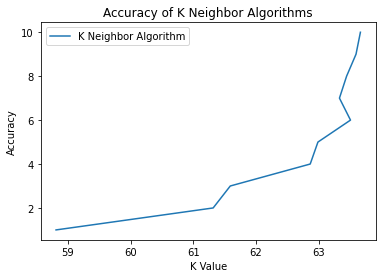

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
accuracy = [58.812, 61.316, 61.589, 62.863, 62.986, 63.505, 63.329, 63.443, 63.593, 63.663]
plt.plot(accuracy, k_hyper_parameters, label = 'K Neighbor Algorithm')
plt.xlabel('K Value') 
plt.ylabel('Accuracy')
plt.title('Accuracy of K Neighbor Algorithms')
plt.legend()
plt.show()


In [ ]:
import pickle 
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 10
train = pd.read_csv('train.csv', skipinitialspace=True, header=None)
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(train.iloc[:,1:],train.iloc[:,0])
model_name = "/content/drive/Shareddrives/1:1DivyaKrishna/Models/knn_final_model/model"
fh = open(model_name,'wb')
pickle.dump(model,fh)
fh.close()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
sortedlabels=model.classes_
cm = pd.DataFrame(confusion_matrix, index=sortedlabels, columns=sortedlabels)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.2)
sns.heatmap(cm,linewidths=0.5,cmap=sns.light_palette((1,0.2,0.6), n_colors=10000),fmt='g', annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

TypeError: ignored